In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import metrics
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn import model_selection

In [2]:
employee = pd.read_csv("employee")
display(employee)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [3]:
employee1 = employee.drop(["JoiningYear","Age","EverBenched", "ExperienceInCurrentDomain", "LeaveOrNot"], axis = 1)

In [4]:
#changing the categorical values to numerical values in order to do a cluster
employee1_mapped = employee1.copy()
employee1_mapped["Education"] = employee1_mapped["Education"].map({"Bachelors":11,"Masters":12,"PHD":13})
employee1_mapped["City"] = employee1_mapped["City"].map({"Bangalore":6,"Pune": 7,"New Delhi":8})
employee1_mapped["Gender"] = employee1_mapped["Gender"].map({"Male":9,"Female": 10})
employee1_mapped

,Education,City,PaymentTier,Gender
0,11,6,3,9
1,11,7,1,10
2,11,8,3,10
3,12,6,3,9
4,12,7,3,9
...,...,...,...,...
4648,11,6,3,10
4649,12,7,2,9
4650,12,8,3,9
4651,11,6,3,9


In [5]:
#scaled the data 

employee1_mapped_scaled = normalize(employee1_mapped)
employee1_mapped_scaled = pd.DataFrame(employee1_mapped_scaled, columns=employee1_mapped.columns)
employee1_mapped_scaled.head()

,Education,City,PaymentTier,Gender
0,0.699913,0.381771,0.190885,0.572656
1,0.668202,0.425220,0.060746,0.607457
2,0.641533,0.466569,0.174964,0.583212
3,0.730297,0.365148,0.182574,0.547723
4,0.713326,0.416107,0.178331,0.534994


In [6]:
from sklearn.preprocessing import LabelEncoder
X = employee1_mapped.values[:, 1:5]
Y = employee1_mapped.values[:,2]
n_samples, n_features = employee1_mapped.shape
n_digits = len(np.unique(Y))
Y2 = LabelEncoder().fit_transform(Y)

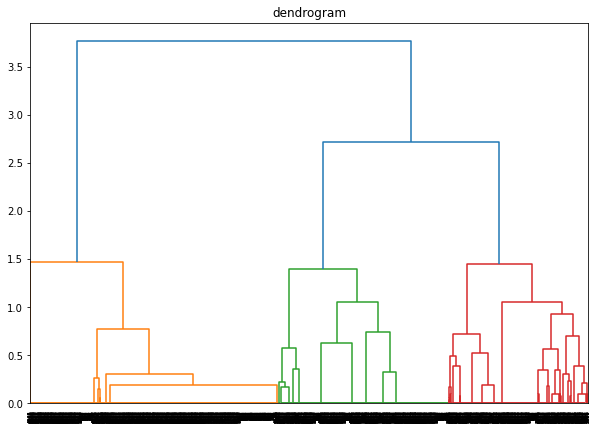

In [7]:
#check how many cluster we have/ 
plt.figure(figsize=(10,7))  
plt.title("dendrogram")  
dend = shc.dendrogram(shc.linkage(employee1_mapped_scaled, method='ward'))

In [9]:
#cosine and average
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='average')  
model.fit_predict(employee1_mapped_scaled)


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [10]:
print("Silhouette score",metrics.silhouette_score(X, model.labels_))
print("Completeness Score",metrics.completeness_score(Y, model.labels_))
print("Homogeneity score",metrics.homogeneity_score(Y, model.labels_))

Silhouette score 0.29228473496976964
Completeness Score 0.5580083990383766
Homogeneity score 0.15239818561477284


In [11]:
#cosine and complete
from sklearn.cluster import AgglomerativeClustering
model1 = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='complete')  
model1.fit_predict(employee1_mapped_scaled)


array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [12]:
#print print cosine and complete scores
print("Silhouette score",metrics.silhouette_score(X, model1.labels_))
print("Completeness Score",metrics.completeness_score(Y, model1.labels_))
print("Homogeneity score",metrics.homogeneity_score(Y, model1.labels_))

Silhouette score 0.4746179114406845
Completeness Score 0.21487523411688547
Homogeneity score 0.24859730089101117


In [13]:
#euclidean and complete
from sklearn.cluster import AgglomerativeClustering
model2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  
model2.fit_predict(employee1_mapped_scaled)

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [14]:
#print print euclidean and complete scores
print("Silhouette score",metrics.silhouette_score(X, model2.labels_))
print("Completeness Score",metrics.completeness_score(Y, model2.labels_))
print("Homogeneity score",metrics.homogeneity_score(Y, model2.labels_))

Silhouette score 0.4746179114406845
Completeness Score 0.21487523411688547
Homogeneity score 0.24859730089101117


In [15]:
#euclidean and ward
from sklearn.cluster import AgglomerativeClustering
model3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
model3.fit_predict(employee1_mapped_scaled)

array([0, 1, 2, ..., 2, 0, 0], dtype=int64)

In [16]:
#print print euclidean and ward scores
print("Silhouette score",metrics.silhouette_score(X, model3.labels_))
print("Completeness Score",metrics.completeness_score(Y, model3.labels_))
print("Homogeneity score",metrics.homogeneity_score(Y, model3.labels_))

Silhouette score 0.521550852010723
Completeness Score 0.5256595039562972
Homogeneity score 0.8144284815251249


In [17]:
#euclidean and average
from sklearn.cluster import AgglomerativeClustering
model4 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')  
model4.fit_predict(employee1_mapped_scaled)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [18]:
#print print euclidean and average scores
print("Silhouette score",metrics.silhouette_score(X, model4.labels_))
print("Completeness Score",metrics.completeness_score(Y, model4.labels_))
print("Homogeneity score",metrics.homogeneity_score(Y, model4.labels_))

Silhouette score 0.29228473496976964
Completeness Score 0.5580083990383766
Homogeneity score 0.15239818561477284


In [19]:
#manhattan and average
from sklearn.cluster import AgglomerativeClustering
model5 = AgglomerativeClustering(n_clusters=3, affinity="manhattan", linkage='average')  
model5.fit_predict(employee1_mapped_scaled)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
#print print manhattan and average scores
print("Silhouette score",metrics.silhouette_score(X, model5.labels_))
print("Completeness Score",metrics.completeness_score(Y, model5.labels_))
print("Homogeneity score",metrics.homogeneity_score(Y, model5.labels_))

Silhouette score 0.11287190796646573
Completeness Score 0.23268602977743327
Homogeneity score 0.00664479860265147


In [21]:
#manhattan and complete
from sklearn.cluster import AgglomerativeClustering
model6 = AgglomerativeClustering(n_clusters=3, affinity="manhattan", linkage='complete')  
model6.fit_predict(employee1_mapped_scaled)

array([1, 2, 2, ..., 0, 1, 1], dtype=int64)

In [22]:
#print print manhattan and complete scores
print("Silhouette score",metrics.silhouette_score(X, model6.labels_))
print("Completeness Score",metrics.completeness_score(Y, model6.labels_))
print("Homogeneity score",metrics.homogeneity_score(Y, model6.labels_))

Silhouette score 0.36432574754808533
Completeness Score 0.12818329419148425
Homogeneity score 0.1903375228598348


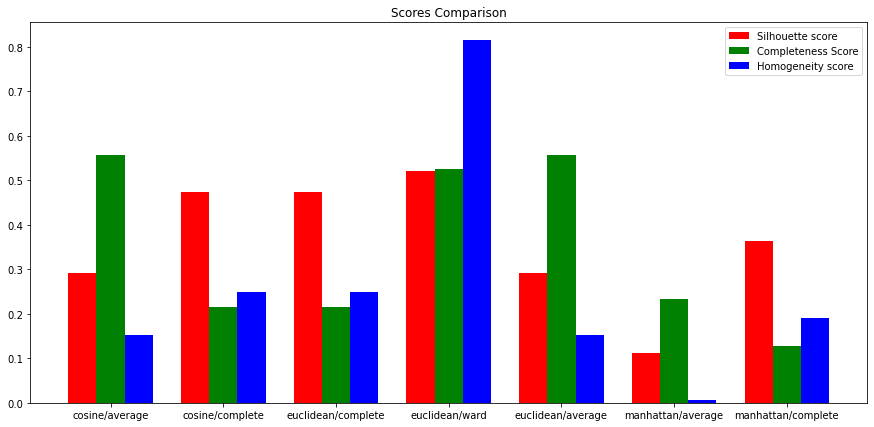

In [33]:
#Scores comparison
N = 7
ind = np.arange(N) 
width = 0.25
plt.figure(figsize=(15,7))  
Silhouette_score = [0.29228473496976964,0.4746179114406845,0.4746179114406845,0.521550852010723,0.29228473496976964,0.11287190796646573,0.36432574754808533]
bar1 = plt.bar(ind, Silhouette_score, width, color = 'r')
  
Completeness_Score = [0.5580083990383766,0.21487523411688547,0.21487523411688547,0.5256595039562972,0.5580083990383766,0.23268602977743327,0.12818329419148425]
bar2 = plt.bar(ind+width, Completeness_Score, width, color='g')
  
Homogeneity_score = [0.15239818561477284,0.24859730089101117,0.24859730089101117,0.8144284815251249,0.15239818561477284,0.00664479860265147,0.1903375228598348]
bar3 = plt.bar(ind+width*2, Homogeneity_score, width, color = 'b')
  
plt.title("Scores Comparison")
  
plt.xticks(ind+width,['cosine/average','cosine/complete','euclidean/complete','euclidean/ward','euclidean/average','manhattan/average','manhattan/complete'])
plt.legend( (bar1, bar2, bar3), ('Silhouette score', 'Completeness Score', 'Homogeneity score') )
plt.show()

In [23]:
#K means
from sklearn import cluster
from sklearn.preprocessing import LabelEncoder
n_samples, n_features = employee1_mapped.shape
n_digits = len(np.unique(Y))
Y2 = LabelEncoder().fit_transform(Y)
for k in range(2, 20):
 kmeans = cluster.KMeans(n_clusters=k)
 kmeans.fit(employee1_mapped)
 print(k)
 print("Silhouette score",metrics.silhouette_score(employee1_mapped, kmeans.labels_))
 print("Completeness Score",metrics.completeness_score(Y2, kmeans.labels_))
 print("Homogeneity score",metrics.homogeneity_score(Y2, kmeans.labels_))


2
Silhouette score 0.43781378042100244
Completeness Score 0.21617948848017723
Homogeneity score 0.2138558670489278
3
Silhouette score 0.46715283601852253
Completeness Score 0.4225879489762793
Homogeneity score 0.5960971942814728
4
Silhouette score 0.4829045023683216
Completeness Score 0.29300044601823644
Homogeneity score 0.5569861269327002
5
Silhouette score 0.5412495744544581
Completeness Score 0.22515348598023124
Homogeneity score 0.5046717047550364
6
Silhouette score 0.5733611439474345
Completeness Score 0.2239482714168082
Homogeneity score 0.5555333394703866
7
Silhouette score 0.6071815754367859
Completeness Score 0.26839211529750173
Homogeneity score 0.7054903128611947
8
Silhouette score 0.6306275916475264
Completeness Score 0.253365421169946
Homogeneity score 0.7053381775644454
9
Silhouette score 0.6575047468590974
Completeness Score 0.25864346778367114
Homogeneity score 0.7470122794266589
10
Silhouette score 0.6827623274584592
Completeness Score 0.19744860182566373
Homogeneity 

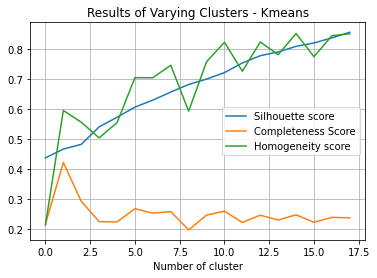

In [24]:

#Comparing results of varying clusters k  means
plt.plot([0.43781378042100244,0.46715283601852253,0.4829045023683216,0.5412495744544581,0.5733611439474345,0.6071815754367859,0.6306275916475264, 0.6575047468590974, 0.6827623274584592,0.7007589921083964,0.7224231144848399,0.7545797855819534,0.7788634069139875,0.7914482743436689,0.8100652832955568,0.8213411888483259,0.8382874912747659,0.8571423243619315])
plt.plot([0.21617948848017723,0.4225879489762793,0.29300044601823644,0.22515348598023124,0.2239482714168082,0.26839211529750173,0.253365421169946,0.25864346778367114,0.19744860182566373,0.2469496823223821,0.25994358369405834,0.22245834520823107,0.24657596501913118,0.23053901174561606,0.24790958771240368,0.22282423161102544,0.23933816561330865,0.23780740920193258])
plt.plot([0.2138558670489278,0.5960971942814728,0.5569861269327002,0.5046717047550364,0.5555333394703866,0.7054903128611947,0.7053381775644454,0.7470122794266589,0.5938590637149023,0.7586531485031663,0.8236293519969287,0.7270247993610475,0.8247727897912287,0.7820021106781698,0.8527687089519914,0.7755079331693397,0.8455045331897726,0.8520549075555421])
plt.xlabel("Number of cluster")
plt.legend(['Silhouette score',"Completeness Score","Homogeneity score"])
plt.title("Results of Varying Clusters - Kmeans")
plt.grid(True)
plt.show()